# LR plot

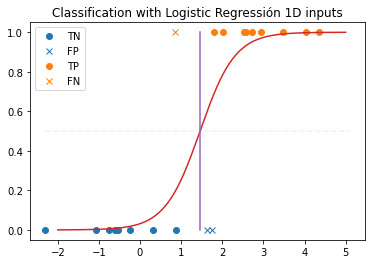

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
np.random.seed(seed=1)
s1 = 10
s2 = 10
x1 = np.random.randn(s1,1)

x2 = np.random.randn(s2,1)*1+2.9

X = np.vstack((x1,x2)).squeeze().reshape(-1, 1)
y = np.vstack((x1*0,x2*0+1)).squeeze()#.reshape(1, -1)


clf_LR = LogisticRegression(penalty='none')
clf_LR.fit(X, y)
clf_LR.coef_[0][0]
clf_LR.intercept_[0]
x_cut = -clf_LR.intercept_[0]/clf_LR.coef_[0][0]

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

x1_good = x1[x1<x_cut]
x1_bad = x1[x1>x_cut]

x2_good = x2[x2>x_cut]
x2_bad = x2[x2<x_cut]

plt.plot(x1_good,np.ones((len(x1_good),1))*0,'o',color=col[0],label='TN')
plt.plot(x1_bad,np.ones((len(x1_bad),1))*0,'x',color=col[0],label='FP')
#plt.plot(x1,np.ones((s1,1))*0,'o',color=col[0])
plt.plot(x2_good,np.ones((len(x2_good),1))*0+1,'o',color=col[1],label='TP')
plt.plot(x2_bad,np.ones((len(x2_bad),1))*0+1,'x',color=col[1],label='FN')
#plt.plot(x2,np.ones((s2,1)),'o',color=col[1])
t = np.linspace(-2,5,1001)
plt.plot(t,1/(1+np.exp(-clf_LR.coef_[0][0]*t-clf_LR.intercept_[0])),color=col[3])
plt.title('Classification with Logistic Regressión 1D inputs')

plt.legend()
plt.plot([x_cut,x_cut],[0,1],color=col[4])
plt.plot([-2.3,5.1],[0.5,0.5],'--',color=col[7],alpha=0.1)
#print(x_cut)
plt.show()